## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [1]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [2]:
mammals = euk[euk['Class'] == 'Mammals'].copy()
mammals.loc[:, 'Number of genes'] = pd.to_numeric(mammals['Number of genes'], errors='coerce')
mammals_with_20k_genes = mammals[mammals['Number of genes'] >= 20000]
num = len(mammals_with_20k_genes)
print(num, "Mammals have at least 20,000 genes")
scientific_names = mammals_with_20k_genes['Species']
print(scientific_names, "These are their scientific names")

134 Mammals have at least 20,000 genes
44             Homo sapiens
45             Mus musculus
65        Rattus norvegicus
70              Felis catus
74               Bos taurus
               ...         
4977      Rattus norvegicus
5087         Macaca mulatta
5152    Macaca fascicularis
5180     Cricetulus griseus
6781           Mus musculus
Name: Species, Length: 134, dtype: object These are their scientific names


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [3]:
animals = euk[euk['Kingdom'] == 'Animals']
class_counts = animals['Class'].value_counts()
class_counts

,count
Class,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [4]:
# Your code here . . .
print("these are how many unique species are there for each class of animals", num)
num = animals.groupby('Class')['Species'].nunique()

these are how many unique species are there for each class of animals 134


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [5]:
# Your code here
names = mammals[mammals['Species'].str.startswith('Macaca ')]
names.Species.unique()


array(['Macaca mulatta', 'Macaca fascicularis', 'Macaca nemestrina',
       'Macaca fuscata fuscata'], dtype=object)

### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [6]:
# Your code here . . .
euk['Species'] = euk['Species'].str.split().str[0:2].str.join(" ")
df_species = euk[['Species', 'Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins']]
df_species

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311,48265
2,Glycine max,Plants,Land Plants,979.046000,59847,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,-,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,-,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,-,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [10]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
animals = df_species[df_species['Kingdom'] == 'Animals']
num = animals.groupby('Class')['Species'].nunique()


<Axes: title={'center': 'num per animal class'}, ylabel='Species'>

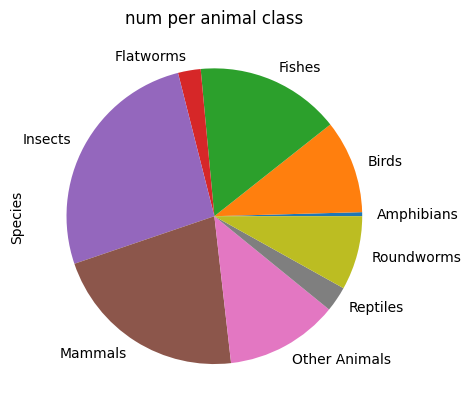

In [14]:
# Create a panda pie plot using the dataframe above
num.plot(kind='pie', title="num per animal class")
# Your code here . . .